<a href="https://colab.research.google.com/github/MiguelOrtega630/IA_2025/blob/main/EDA_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = sns.load_dataset('titanic')
df = df[['survived', 'sex']]  # Nos quedamos con columnas relevantes
df.rename(columns={'survived': 'Survived', 'sex': 'Sex'}, inplace=True)

In [ ]:
df = pd.read_csv("/content/titanic-train.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
def bar_char(df, feature):
    survived = df[df['Survived'] == 1][feature].value_counts()
    dead = df[df['Survived'] == 0][feature].value_counts()

    test = pd.DataFrame([survived, dead])
    test.index = ['Sobrevivientes', 'Fallecidos']

    test.T.plot(kind="bar", stacked=True, figsize=(10, 5))  # .T para transponer, eje X sean los valores de la variable
    plt.xlabel(feature)
    plt.ylabel('Número de pasajeros')
    plt.title('Cantidad de supervivientes y fallecidos según: ' + feature)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

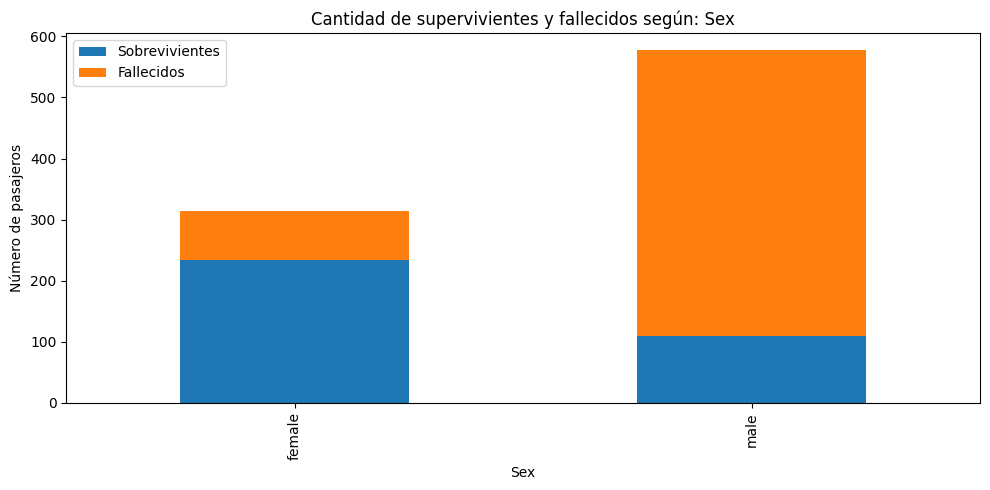

In [ ]:
bar_char(df, 'Sex')

In [3]:
df.describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
df.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [16]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1131372151.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


In [17]:
df["Title"]=extract_title(df)
df["Title"]=value_counts()

KeyError: 'Name'

In [15]:
def replace_titles(data):
  title_mapping=("Mr":"Señor","Miss":"Señorita","Mrs":"Señorita")
  data["Title"]=data["Title"].map(title_mapping).fillna("Otros")
  return data

SyntaxError: invalid syntax (ipython-input-3494925710.py, line 2)

In [14]:
df=replace_titles(df)
df.sample(10)

NameError: name 'replace_titles' is not defined

In [23]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
df.head()

KeyError: "['Name', 'Ticket', 'Cabin'] not found in axis"

In [ ]:
df["Age"]=dfapply(lamda row:titleage_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)
df.head(15)

In [ ]:
df["Age"].isnull().sum


In [ ]:
me clasifique en varios grupos las pérsonas q subieron al titanic(niños,señoritas,señoras,señores,ancianos)
 rango edades
 niños 0 12 años
 adolecentes 13 19 años
 joven adulto 20 35 años
 adultos 36 60
 aldulto mayor mayor de 60
